# Nikita Chandra Lazarus

## Is a spectator more likely to commit a crime if the team (wins/loses) or are they more susceptible to disorderly conduct for marginal results (OT)? (emotional influence) 

The team would like to conduct a research on which days during the week the home team has the most and the least wins. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/Users/nikitachandralzrs/Desktop/301/project-group03/data/raw/arrests.csv', sep= ",")

# Exploratory Data Analysis of arrests data

In [ ]:
df.columns

Index(['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team',
       'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests',
       'division_game'],
      dtype='object')

In [ ]:
df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [ ]:
df.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y
1005,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n


In [ ]:
print(df.shape)
print(df.head())
print(df.columns)

(1006, 11)
   season  week_num day_of_week gametime_local home_team        away_team  \
0    2011         1      Sunday     1:15:00 PM   Arizona         Carolina   
1    2011         4      Sunday     1:05:00 PM   Arizona  New York Giants   
2    2011         7      Sunday     1:05:00 PM   Arizona       Pittsburgh   
3    2011         9      Sunday     2:15:00 PM   Arizona        St. Louis   
4    2011        13      Sunday     2:15:00 PM   Arizona           Dallas   

   home_score  away_score OT_flag  arrests division_game  
0          28          21     NaN      5.0             n  
1          27          31     NaN      6.0             n  
2          20          32     NaN      9.0             n  
3          19          13      OT      6.0             y  
4          19          13      OT      3.0             n  
Index(['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team',
       'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests',
       'division_game'],
  

In [ ]:
df.nunique(axis=0)

season             5
week_num          17
day_of_week        5
gametime_local    46
home_team         26
away_team         32
home_score        54
away_score        46
OT_flag            1
arrests           51
division_game      2
dtype: int64

# Clean Data
1. We will remove season column, week_num, gametime_local, OT_Flag, arrests, division_game

In [ ]:
df = df.drop(columns=['season', 'week_num', 'gametime_local', 'OT_flag', 'arrests', 'division_game'])
df.head(n=5)

,day_of_week,home_team,away_team,home_score,away_score
0,Sunday,Arizona,Carolina,28,21
1,Sunday,Arizona,New York Giants,27,31
2,Sunday,Arizona,Pittsburgh,20,32
3,Sunday,Arizona,St. Louis,19,13
4,Sunday,Arizona,Dallas,19,13


# Process Data
1. Change column names to remove underscore (_) 
2. Make new column called ScoreDifference to find the difference of HomeScore and AwayScore, then a new column HomeTeamWin with  True if ScoreDifference > 0, False otherwise

In [ ]:
df = df.rename(columns={'day_of_week': 'DayOfWeek', 'home_team': 'HomeTeam', 'away_team': 'AwayTeam', 'home_score': 'HomeScore', 'away_score': 'AwayScore'})
df.head(n=5)

,DayOfWeek,HomeTeam,AwayTeam,HomeScore,AwayScore
0,Sunday,Arizona,Carolina,28,21
1,Sunday,Arizona,New York Giants,27,31
2,Sunday,Arizona,Pittsburgh,20,32
3,Sunday,Arizona,St. Louis,19,13
4,Sunday,Arizona,Dallas,19,13


In [ ]:
df= df.assign(ScoreDifference = lambda x: x['HomeScore'] - x['AwayScore'])
df.loc[df['ScoreDifference']>0, 'HomeTeamWin'] = True
df.loc[df['ScoreDifference']<= 0, 'HomeTeamWin'] = False

df.head(n=5)

,DayOfWeek,HomeTeam,AwayTeam,HomeScore,AwayScore,ScoreDifference,HomeTeamWin
0,Sunday,Arizona,Carolina,28,21,7,True
1,Sunday,Arizona,New York Giants,27,31,-4,False
2,Sunday,Arizona,Pittsburgh,20,32,-12,False
3,Sunday,Arizona,St. Louis,19,13,6,True
4,Sunday,Arizona,Dallas,19,13,6,True


In [ ]:
import project_functions2 as pf2

df = pf2.load_and_process('/Users/nikitachandralzrs/Desktop/301/project-group03/data/raw/arrests.csv')
df.head(n=5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(50,25)})

[Text(0.5, 1.0, 'Probability of winning by each team in given day of week'),
 Text(0.5, 0, 'Teams'),
 Text(0, 0.5, 'Probability of winnning')]

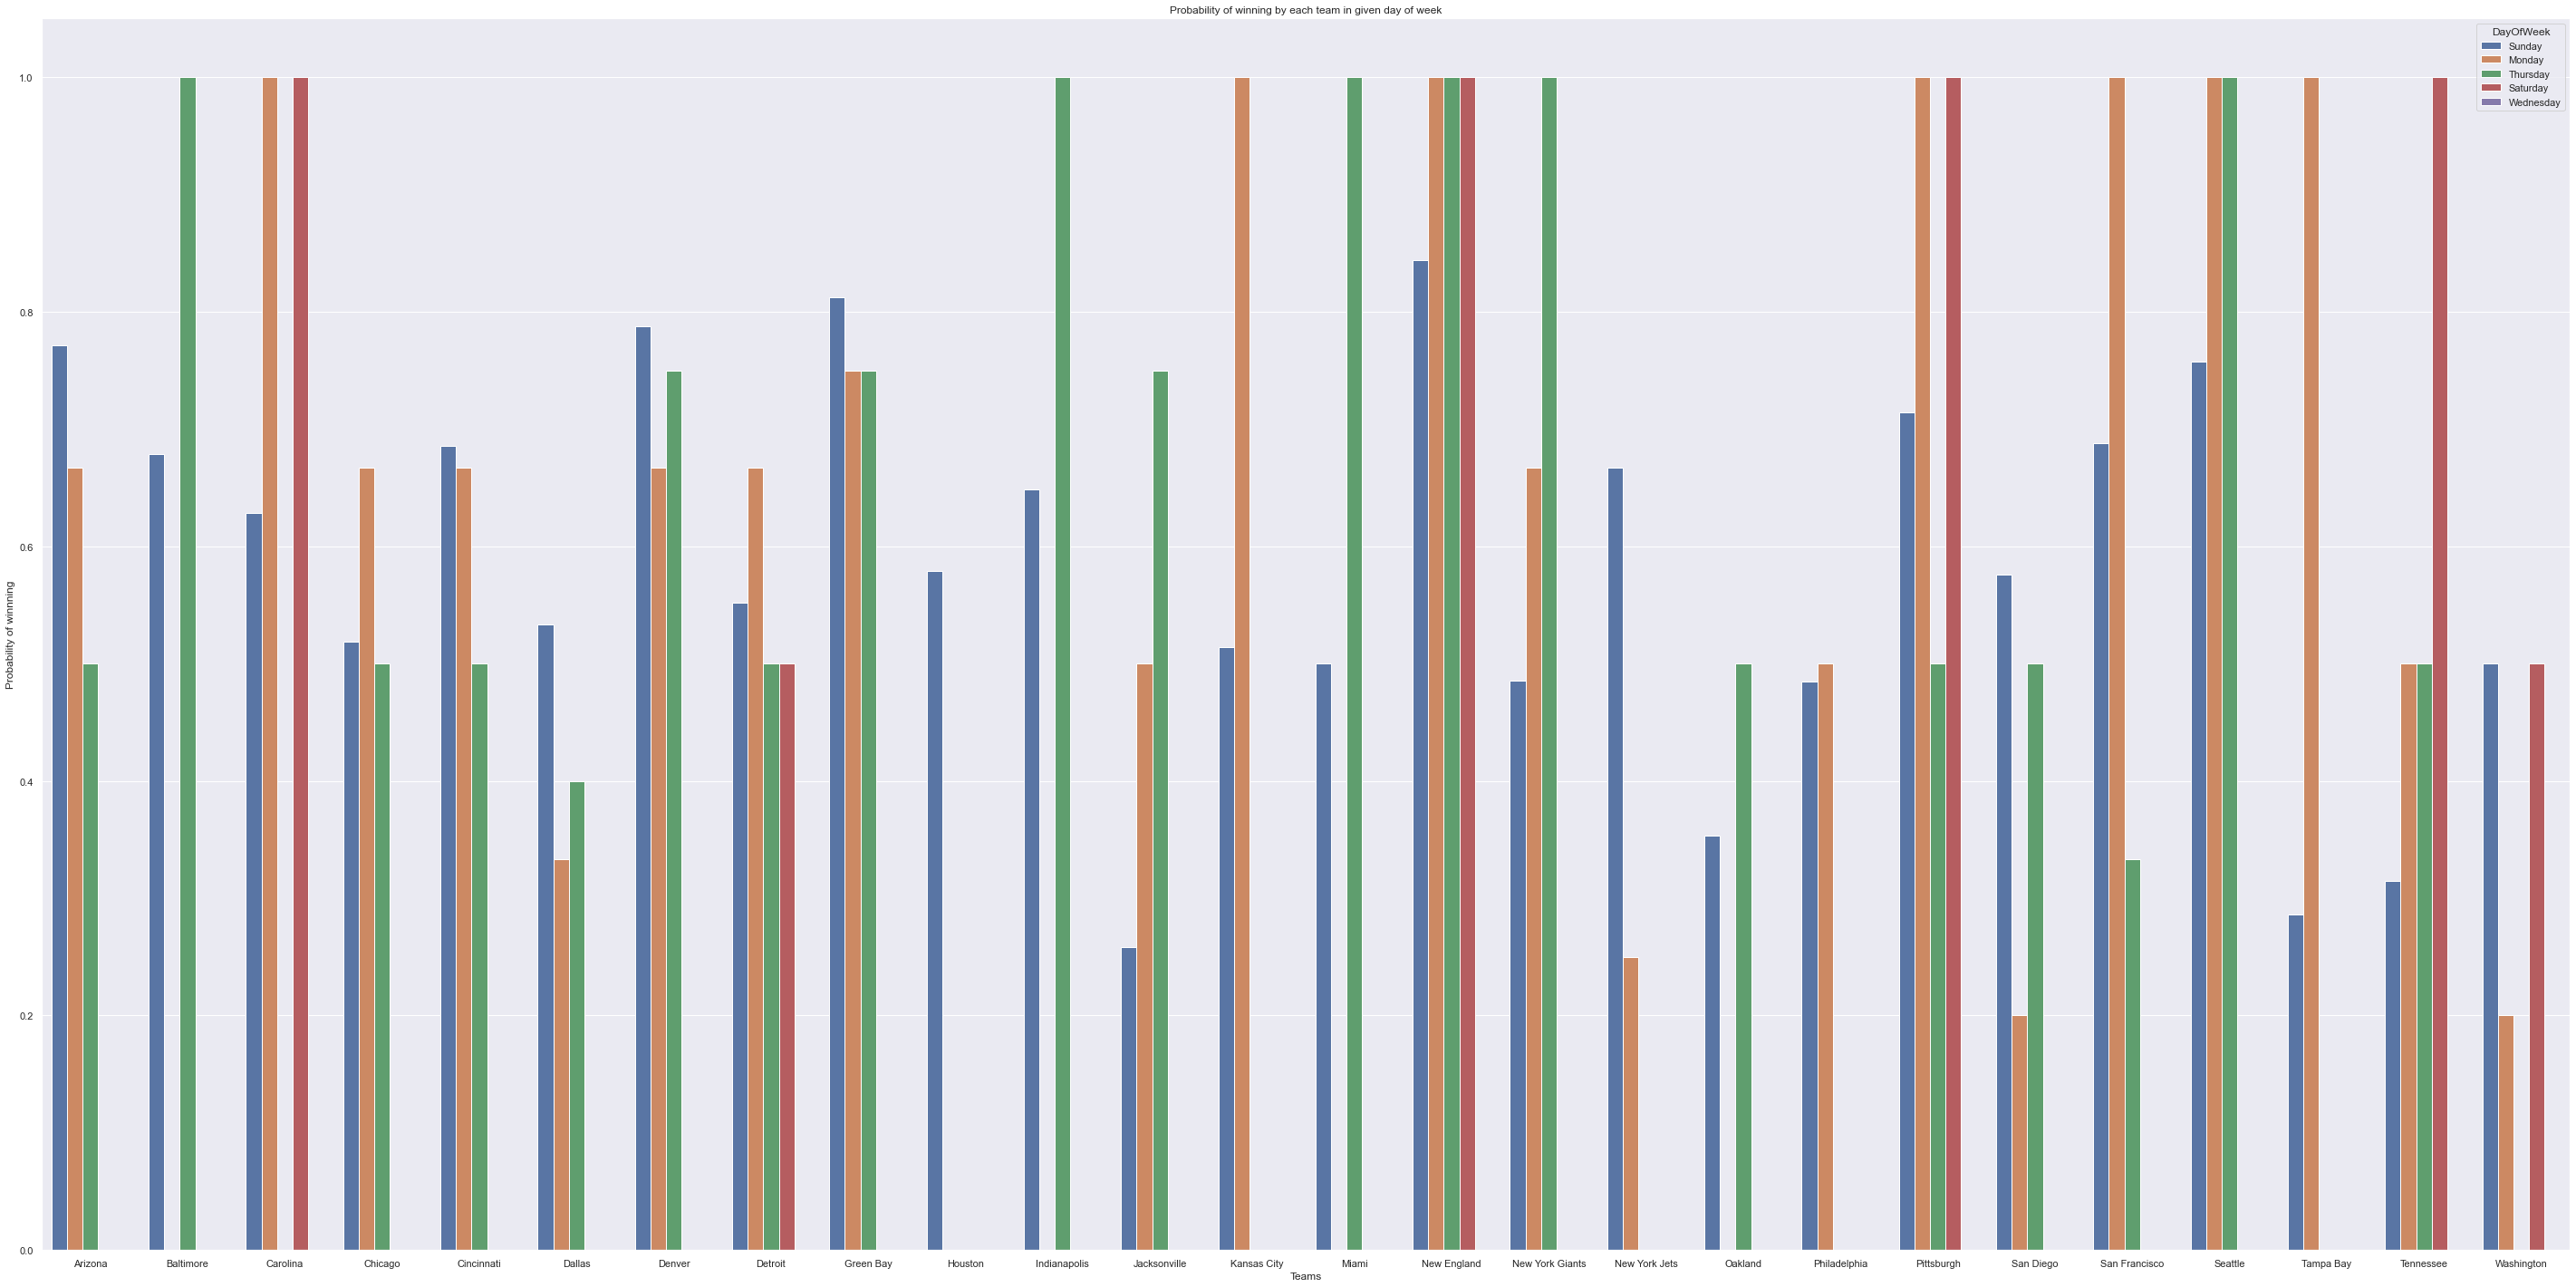

In [ ]:
bp = sns.barplot(data=df, x='HomeTeam', y='HomeTeamWin', hue='DayOfWeek',errorbar = None)
bp.set(title="Probability of winning by each team in given day of week", xlabel="Teams", ylabel="Probability of winnning")


## Reading of The Chart
---
The probability of the home team winning are only happening during **Sunday, Monday, Thursday, and Saturday**. And no probability of winning on **Wednesday**.

For Sunday, the highest probability of winning goes to team New England and the lowest goes to Jacksonville.

For Monday, the highest probability of winning goes to team Carolina, Kansas City, New England, Pittsburgh, San Fransisco, Seattle, and Tampa Bay; and the lowest goes to San Diego and Washington.

For Thursday, the highest probability of winning goes to Baltimore, Indianapolis, New England, New York Giants, and Seattle; while the lowest goes to San Fransisco.

And for Saturday, the probability of winning goes to Carolina, New England, Pittsburgh, and Tennesse; and the lowest goes to Washington.

# Conclusion
---
Monday has the most winning from the home team, whilst Sunday has the least.